# Credit Risk Modeling - Exploratory Data Analysis (EDA)

**Dataset:** Lending Club Loan Data (2007-2018) - Kaggle

**Objective:** Understand the data structure, identify patterns, and discover predictive signals for loan default.

---

## Table of Contents

1. [Setup & Data Loading](#1-setup--data-loading)
2. [Initial Data Inspection](#2-initial-data-inspection)
3. [Target Variable Analysis](#3-target-variable-analysis)
4. [Missing Values Analysis](#4-missing-values-analysis)
5. [Numerical Features Analysis](#5-numerical-features-analysis)
6. [Categorical Features Analysis](#6-categorical-features-analysis)
7. [Temporal Patterns](#7-temporal-patterns)
8. [Correlation Analysis](#8-correlation-analysis)
9. [Key Insights & Next Steps](#9-key-insights--next-steps)

---
## 1. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.1.4
NumPy version: 1.26.2


In [4]:
data_path = Path('../data/raw/lending_club.csv')

print("Loading most recent 500K loans...")

# Paso 1: Contar filas totales
total_rows = 2260668

# Paso 2: Calcular cuántas skipear
n_rows_to_load = 500000
skip_rows = total_rows - n_rows_to_load

print(f"Total rows in dataset: {total_rows:,}")
print(f"Skipping first {skip_rows:,} rows")
print(f"Loading last {n_rows_to_load:,} rows (most recent loans)...")

# Paso 3: Cargar saltando las primeras
df = pd.read_csv(
    data_path, 
    skiprows=range(1, skip_rows + 1),
    low_memory=False
)

print(f"\n✓ Data loaded: {df.shape}")

# Convertir issue_d a datetime
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    print(f"Date range: {df['issue_d'].min()} to {df['issue_d'].max()}")
else:
    print("Column 'issue_d' not found")

print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading most recent 500K loans...
Total rows in dataset: 2,260,668
Skipping first 1,760,668 rows
Loading last 500,000 rows (most recent loans)...

✓ Data loaded: (500033, 151)
Date range: 2012-01-01 00:00:00 to 2017-12-01 00:00:00
Memory usage: 1398.98 MB


---
## 2. Initial Data Inspection

In [5]:
# Display first few rows
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,9216190,NaN,15000.000,15000.000,15000.000,36 months,11.990,498.150,B,B3,Branch Manager,9 years,MORTGAGE,113000.000,Verified,2013-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,070xx,NJ,9.150,0.000,Dec-2007,775.000,779.000,1.000,NaN,NaN,9.000,0.000,3636.000,13.400,18.000,f,0.000,0.000,16451.380,16451.380,15000.000,1451.380,0.000,0.000,0.000,Nov-2014,11470.050,NaN,...,2.000,9.000,0.000,0.000,0.000,3.000,100.000,0.000,0.000,0.000,392546.000,39067.000,10500.000,35163.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,9374925,NaN,14000.000,14000.000,14000.000,36 months,11.990,464.940,B,B3,BATTALION CBRN NCO,10+ years,MORTGAGE,69990.000,Source Verified,2013-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,CONSOLODATION LOAN,313xx,GA,27.050,0.000,Dec-1998,700.000,704.000,4.000,62.000,NaN,13.000,0.000,12907.000,38.900,32.000,w,0.000,0.000,16503.710,16503.710,14000.000,2503.710,0.000,0.000,0.000,Mar-2016,4880.210,NaN,...,5.000,13.000,0.000,0.000,0.000,3.000,90.600,40.000,0.000,0.000,312428.000,94991.000,12900.000,83989.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,9048251,NaN,4000.000,4000.000,4000.000,36 months,12.850,134.490,B,B4,Network engineer,8 years,RENT,62000.000,Verified,2013-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,222xx,VA,6.690,1.000,Oct-2000,690.000,694.000,0.000,8.000,NaN,9.000,0.000,2049.000,9.500,50.000,f,0.000,0.000,4775.110,4775.110,4000.000,775.110,0.000,0.000,0.000,Feb-2016,1412.860,NaN,...,5.000,9.000,0.000,0.000,1.000,3.000,93.900,0.000,0.000,0.000,47305.000,24294.000,15500.000,25705.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,9224636,NaN,8000.000,8000.000,8000.000,36 months,12.850,268.980,B,B4,Auto Technician,10+ years,RENT,52000.000,Not Verified,2013-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,331xx,FL,7.690,0.000,Oct-2000,685.000,689.000,0.000,NaN,NaN,7.000,0.000,11409.000,57.600,9.000,w,0.000,0.000,968

In [6]:
# Column names and types
print(f"Total columns: {len(df.columns)}\n")
print("Column data types:")
df.dtypes.value_counts()

Total columns: 151

Column data types:


float64           113
object             37
datetime64[ns]      1
Name: count, dtype: int64

In [7]:
# Basic statistics
print("Numerical features summary:\n")
df.describe()

Numerical features summary:



,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025,499771.000,500025.000,500025.000,500025.000,500025.000,239086.000,74958.000,500025.000,500025.000,500025.000,499571.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,500025.000,119492.000,500025.000,21864.000,21864.000,500025.000,472284.000,472284.000,321314.000,321314.000,321314.000,321314.000,311684.000,321314.000,276614.000,321314.000,321314.000,321314.000,...,472284.000,492530.000,487194.000,111489.000,436640.000,161287.000,472284.000,472284.000,472284.000,483970.000,472284.000,472284.000,472284.000,472284.000,472284.000,483970.000,456352.000,472284.000,472284.000,472284.000,472131.000,486747.000,500025.000,500025.000,472284.000,492530.000,492530.000,472284.000,17210.000,17211.000,17211.000,17211.000,17211.000,17211.000,16859.000,17211.000,17211.000,17211.000,17211.000,6024.000,2697.000,2697.000,2697.000,2697.000,2093.000,2697.000,2697.000,7235.000,7235.000,7235.000
mean,NaN,14495.494,14494.546,14486.794,13.705,440.234,76705.996,2015-09-23 07:30:32.517174272,18.153,0.294,698.174,702.174,0.635,34.691,74.277,11.346,0.187,16043.416,51.767,23.812,2694.594,2693.812,13214.883,13207.345,10353.970,2704.780,1.655,154.478,22.526,3765.066,684.187,671.471,0.015,43.818,1.000,119211.744,19.427,0.004,197.172,140584.067,0.967,2.788,0.684,1.599,20.972,35412.433,69.794,1.316,2.781,5598.978,...,8.412,1.571,24.982,39.357,6.920,35.805,0.468,3.649,5.541,4.693,7.843,8.171,8.080,13.872,5.494,11.359,0.001,0.003,0.080,2.016,94.222,44.333,0.122,0.045,174474.320,48422.744,22051.967,41650.234,32804.700,665.509,669.509,0.711,1.460,11.482,59.590,3.109,12.530,0.069,0.102,35.138,3.000,169.367,3.000,14.030,488.575,12382.102,195.923,5015.147,47.736,12.961
min,NaN,1000.000,1000.000,950.000,5.320,4.930,0.000,2012-01-01 00:00:00,0.000,0.000,660.000,664.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,13464.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [8]:
# Categorical features
print("Categorical features summary:\n")
df.describe(include=['object'])

Categorical features summary:



,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,500033,500025,500025,500025,466001,470047,500025,500025,500025,500025,500025,78439,500025,494586,500025,500025,500025,500025,499459,169010,500001,500025,21858,17211,500025,2697,2697,2697,2697,2697,2697,2697,500025,500025,7235,7235,7235
unique,500033,2,7,35,197896,11,6,3,7,2,500025,77669,14,43391,908,51,693,2,86,3,88,2,3,565,2,1,9,3,23,25,24,5,2,2,69,3,75
top,9216190,36 months,B,C1,Teacher,10+ years,MORTGAGE,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt consolidation,945xx,CA,Oct-2001,w,Mar-2019,Apr-2019,Mar-2019,Individual,Not Verified,Sep-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Sep-2017,Dec-2017,Oct-2017,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Jan-2019
freq,1,372445,161427,34105,6563,166235,246546,173846,266023,499847,1,6,285827,197498,5562,72728,3247,280296,157263,168942,275566,478161,12422,158,499786,2697,700,1854,572,452,426,1231,496366,492790,591,3606,430


---
## 3. Target Variable Analysis

Our target variable is **loan_status**, which indicates whether a loan defaulted or was fully paid.

In [9]:
# Loan status distribution
print("Loan Status Distribution:\n")
print(df['loan_status'].value_counts())
print("\nPercentages:")
print(df['loan_status'].value_counts(normalize=True) * 100)

Loan Status Distribution:

loan_status
Fully Paid            266023
Current               161286
Charged Off            64992
Late (31-120 days)      4969
In Grace Period         1774
Late (16-30 days)        968
Default                   13
Name: count, dtype: int64

Percentages:
loan_status
Fully Paid           53.202
Current              32.256
Charged Off          12.998
Late (31-120 days)    0.994
In Grace Period       0.355
Late (16-30 days)     0.194
Default               0.003
Name: proportion, dtype: float64


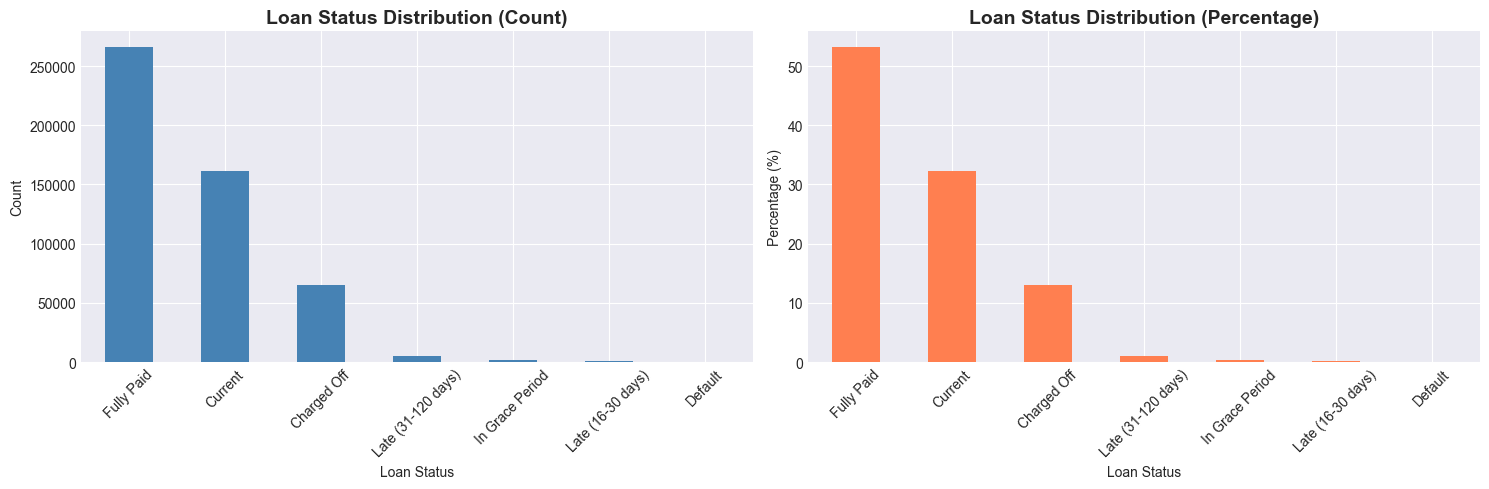

In [10]:
# Visualize loan status distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
df['loan_status'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Loan Status Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Percentage plot
(df['loan_status'].value_counts(normalize=True) * 100).plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Loan Status Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Binary Target Distribution:

target
0.000    266023
1.000     65005
Name: count, dtype: int64

Default Rate:
19.64%


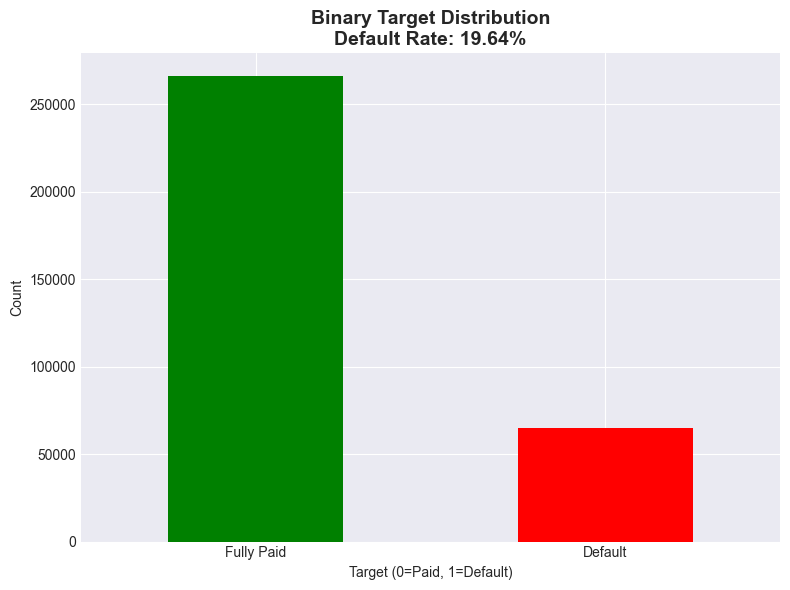

In [11]:
# Define binary target variable
# Default = 1, Fully Paid = 0

default_statuses = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

paid_statuses = [
    'Fully Paid',
    'Does not meet the credit policy. Status:Fully Paid'
]

# Create binary target
df['target'] = df['loan_status'].apply(
    lambda x: 1 if x in default_statuses else (0 if x in paid_statuses else np.nan)
)

print("Binary Target Distribution:\n")
print(df['target'].value_counts())
print("\nDefault Rate:")
default_rate = df['target'].mean() * 100
print(f"{default_rate:.2f}%")

# Visualize binary target
fig, ax = plt.subplots(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_title(f'Binary Target Distribution\nDefault Rate: {default_rate:.2f}%', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Target (0=Paid, 1=Default)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Fully Paid', 'Default'], rotation=0)
plt.tight_layout()
plt.show()

---
## 4. Missing Values Analysis

In [12]:
# Calculate missing values
missing = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df)) * 100
}).sort_values('missing_pct', ascending=False)

# Filter columns with missing values
missing_cols = missing[missing['missing_count'] > 0]

print(f"Total columns with missing values: {len(missing_cols)}\n")
print("Top 20 columns with highest missing percentage:\n")
print(missing_cols.head(20))

Total columns with missing values: 151

Top 20 columns with highest missing percentage:

                                                                                column  \
member_id                                                                    member_id   
orig_projected_additional_accrued_interest  orig_projected_additional_accrued_interest   
hardship_loan_status                                              hardship_loan_status   
hardship_type                                                            hardship_type   
hardship_reason                                                        hardship_reason   
hardship_status                                                        hardship_status   
deferral_term                                                            deferral_term   
hardship_start_date                                                hardship_start_date   
hardship_end_date                                                    hardship_end_date   
payment_pla

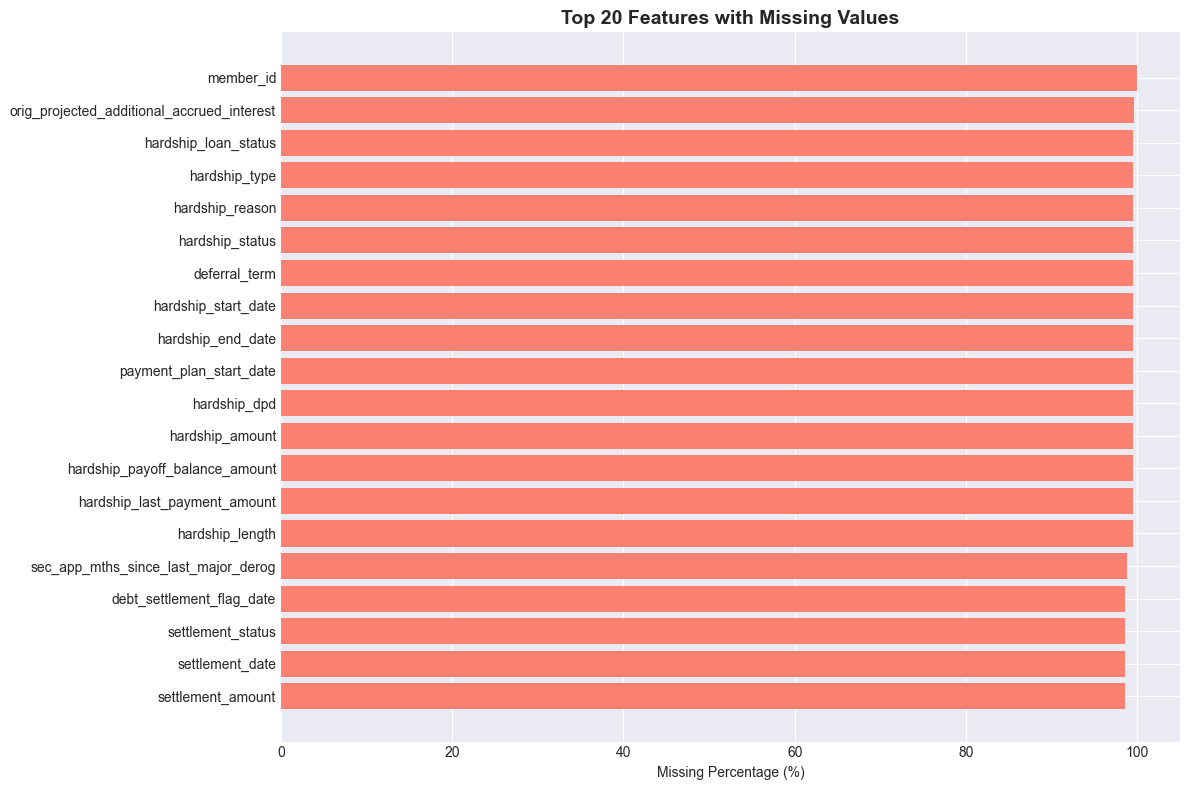

In [13]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 8))

top_missing = missing_cols.head(20)
ax.barh(top_missing['column'], top_missing['missing_pct'], color='salmon')
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [14]:
safe_to_drop = [
    'member_id',        # ID único, no predictivo
    'desc',             # Descripción de texto libre
    'url',              # URL del loan
    # Hardship (todas >99% missing)
    'hardship_dpd', 'hardship_type', 'hardship_reason', 
    'hardship_status', 'hardship_amount', 'hardship_start_date',
    'hardship_end_date', 'hardship_length', 'deferral_term',
    'hardship_loan_status', 'hardship_payoff_balance_amount',
    'hardship_last_payment_amount', 'payment_plan_start_date',
    # Settlement (todas >97% missing)
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
    # Otros con mucho missing
    'sec_app_mths_since_last_major_derog',
    'orig_projected_additional_accrued_interest'
]

# Filtrar solo las que existen
safe_to_drop = [col for col in safe_to_drop if col in df.columns]
df_clean = df.drop(columns=safe_to_drop)

print(f"Eliminadas {len(safe_to_drop)} columnas")
print(f"Columnas restantes: {df_clean.shape[1]}")

Eliminadas 21 columnas
Columnas restantes: 131


---
## 5. Numerical Features Analysis

In [15]:
# Select key numerical features for analysis
key_numerical = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 
    'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'delinq_2yrs', 'inq_last_6mths'
]

# Filter only existing columns
key_numerical = [col for col in key_numerical if col in df.columns]

print(f"Analyzing {len(key_numerical)} key numerical features\n")
df[key_numerical].describe()

Analyzing 12 key numerical features



,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,inq_last_6mths
count,500025.000,500025.000,500025.000,500025.000,499771.000,500025.000,500025.000,500025.000,499571.000,500025.000,500025.000,500025.000
mean,14495.494,13.705,440.234,76705.996,18.153,11.346,0.187,16043.416,51.767,23.812,0.294,0.635
std,8967.816,4.832,266.897,69658.482,12.722,5.385,0.559,21684.679,24.636,11.633,0.841,0.918
min,1000.000,5.320,4.930,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000
25%,7800.000,10.420,247.290,45760.000,11.650,8.000,0.000,6064.000,33.100,15.000,0.000,0.000
50%,12000.000,13.110,375.910,65000.000,17.420,10.000,0.000,11218.000,52.300,22.000,0.000,0.000
75%,20000.000,16.290,582.170,90434.000,23.750,14.000,0.000,19625.000,71.000,30.000,0.000,1.000
max,40000.000,30.990,1714.540,8400000.000,999.000,97.000,61.000,2568995.000,162.000,165.000,36.000,8.000


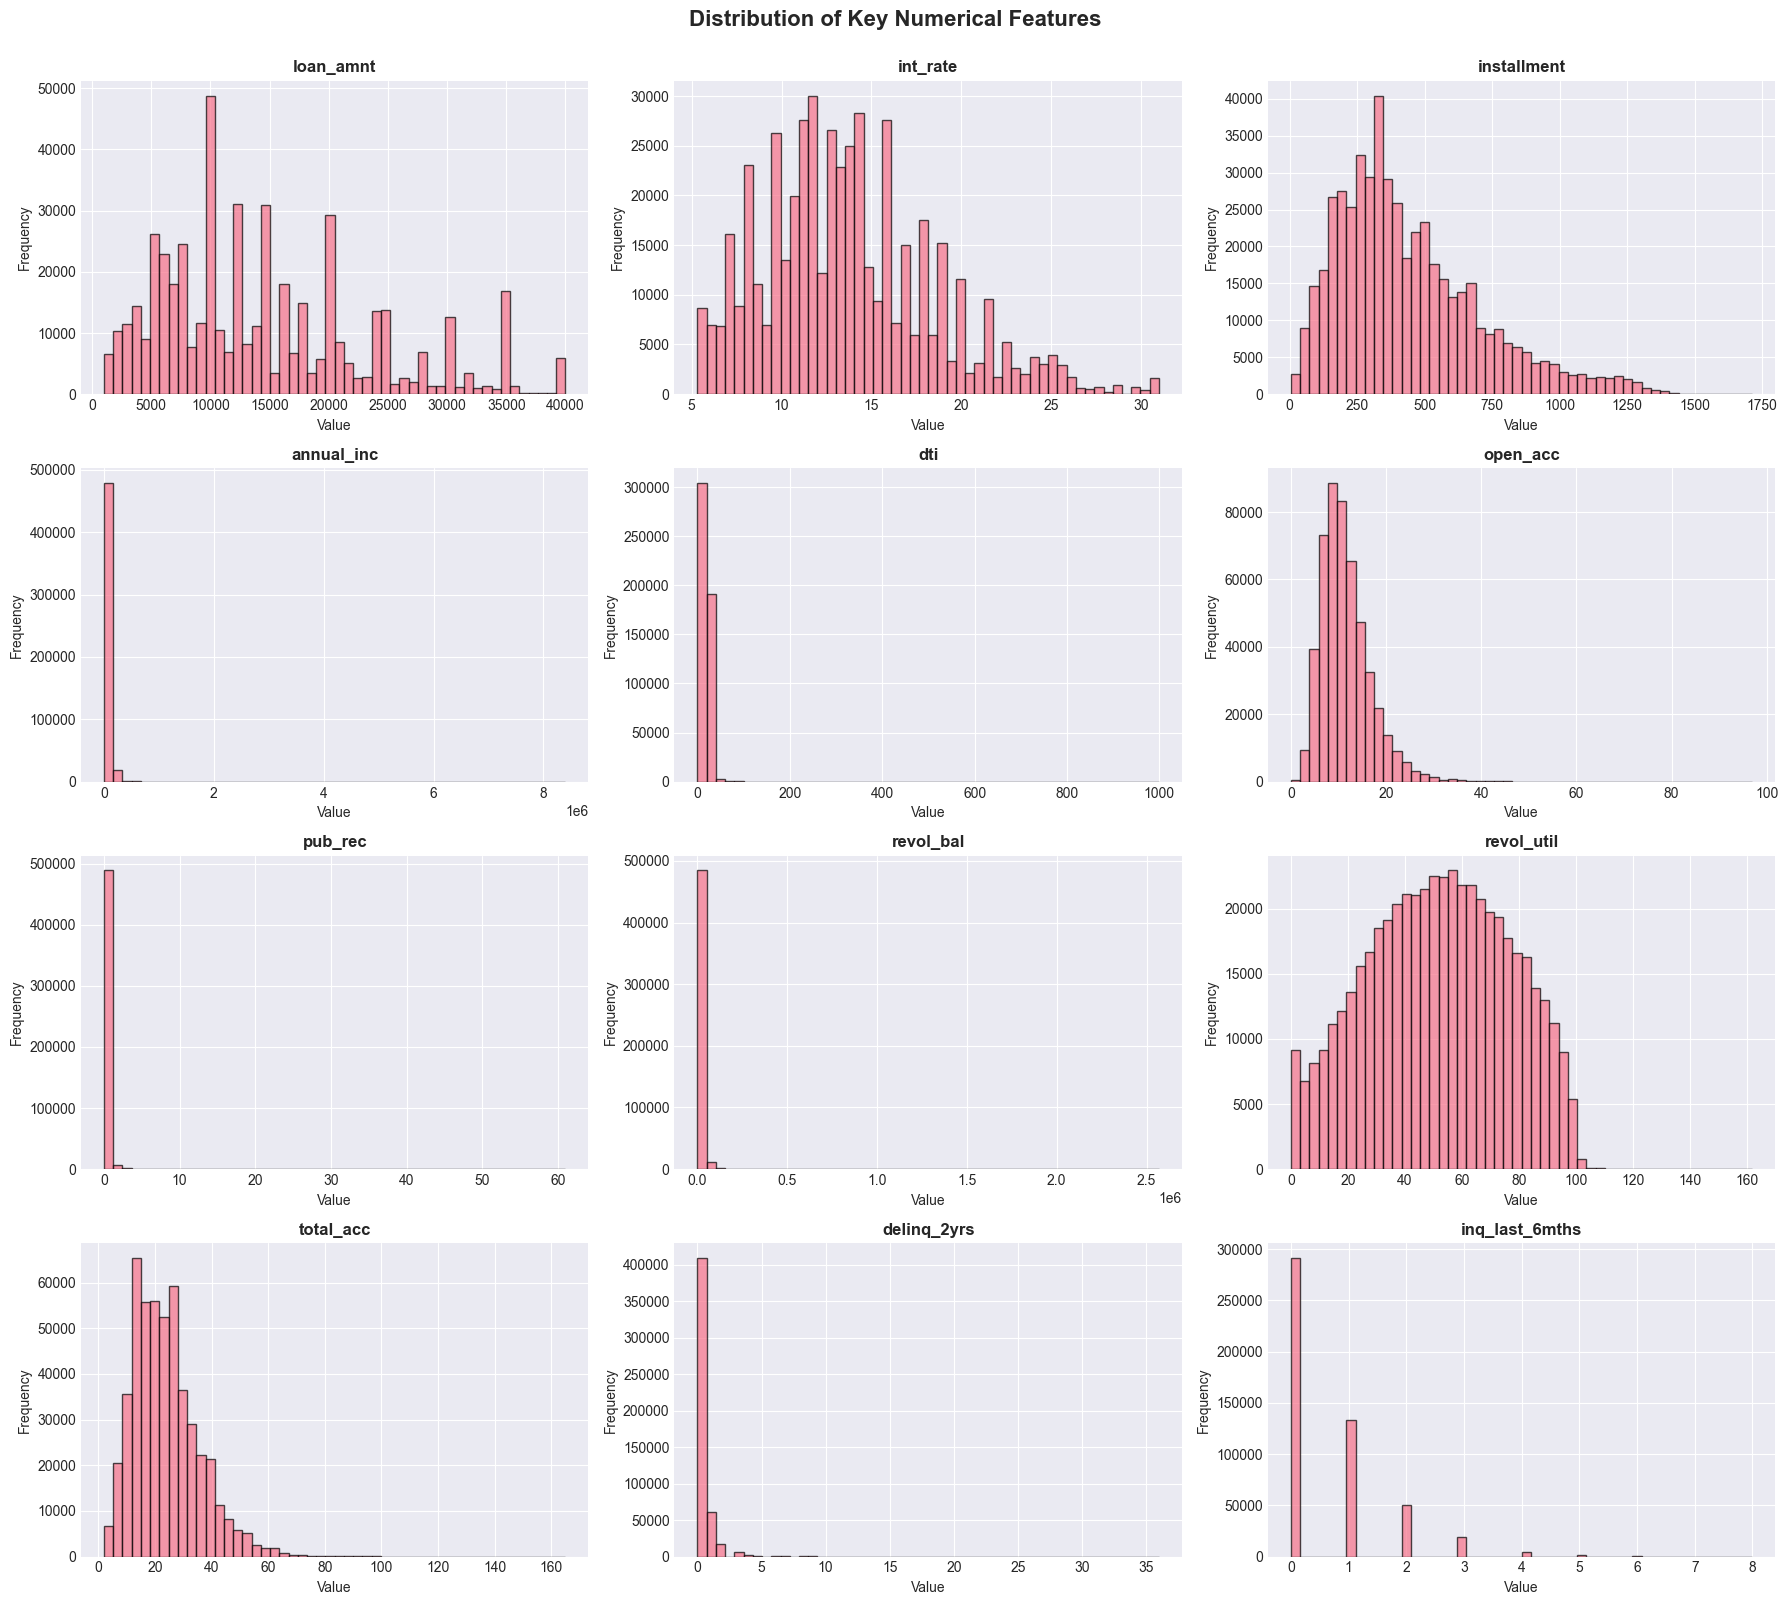

In [16]:
# Distribution of key numerical features
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(key_numerical[:12]):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')

plt.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

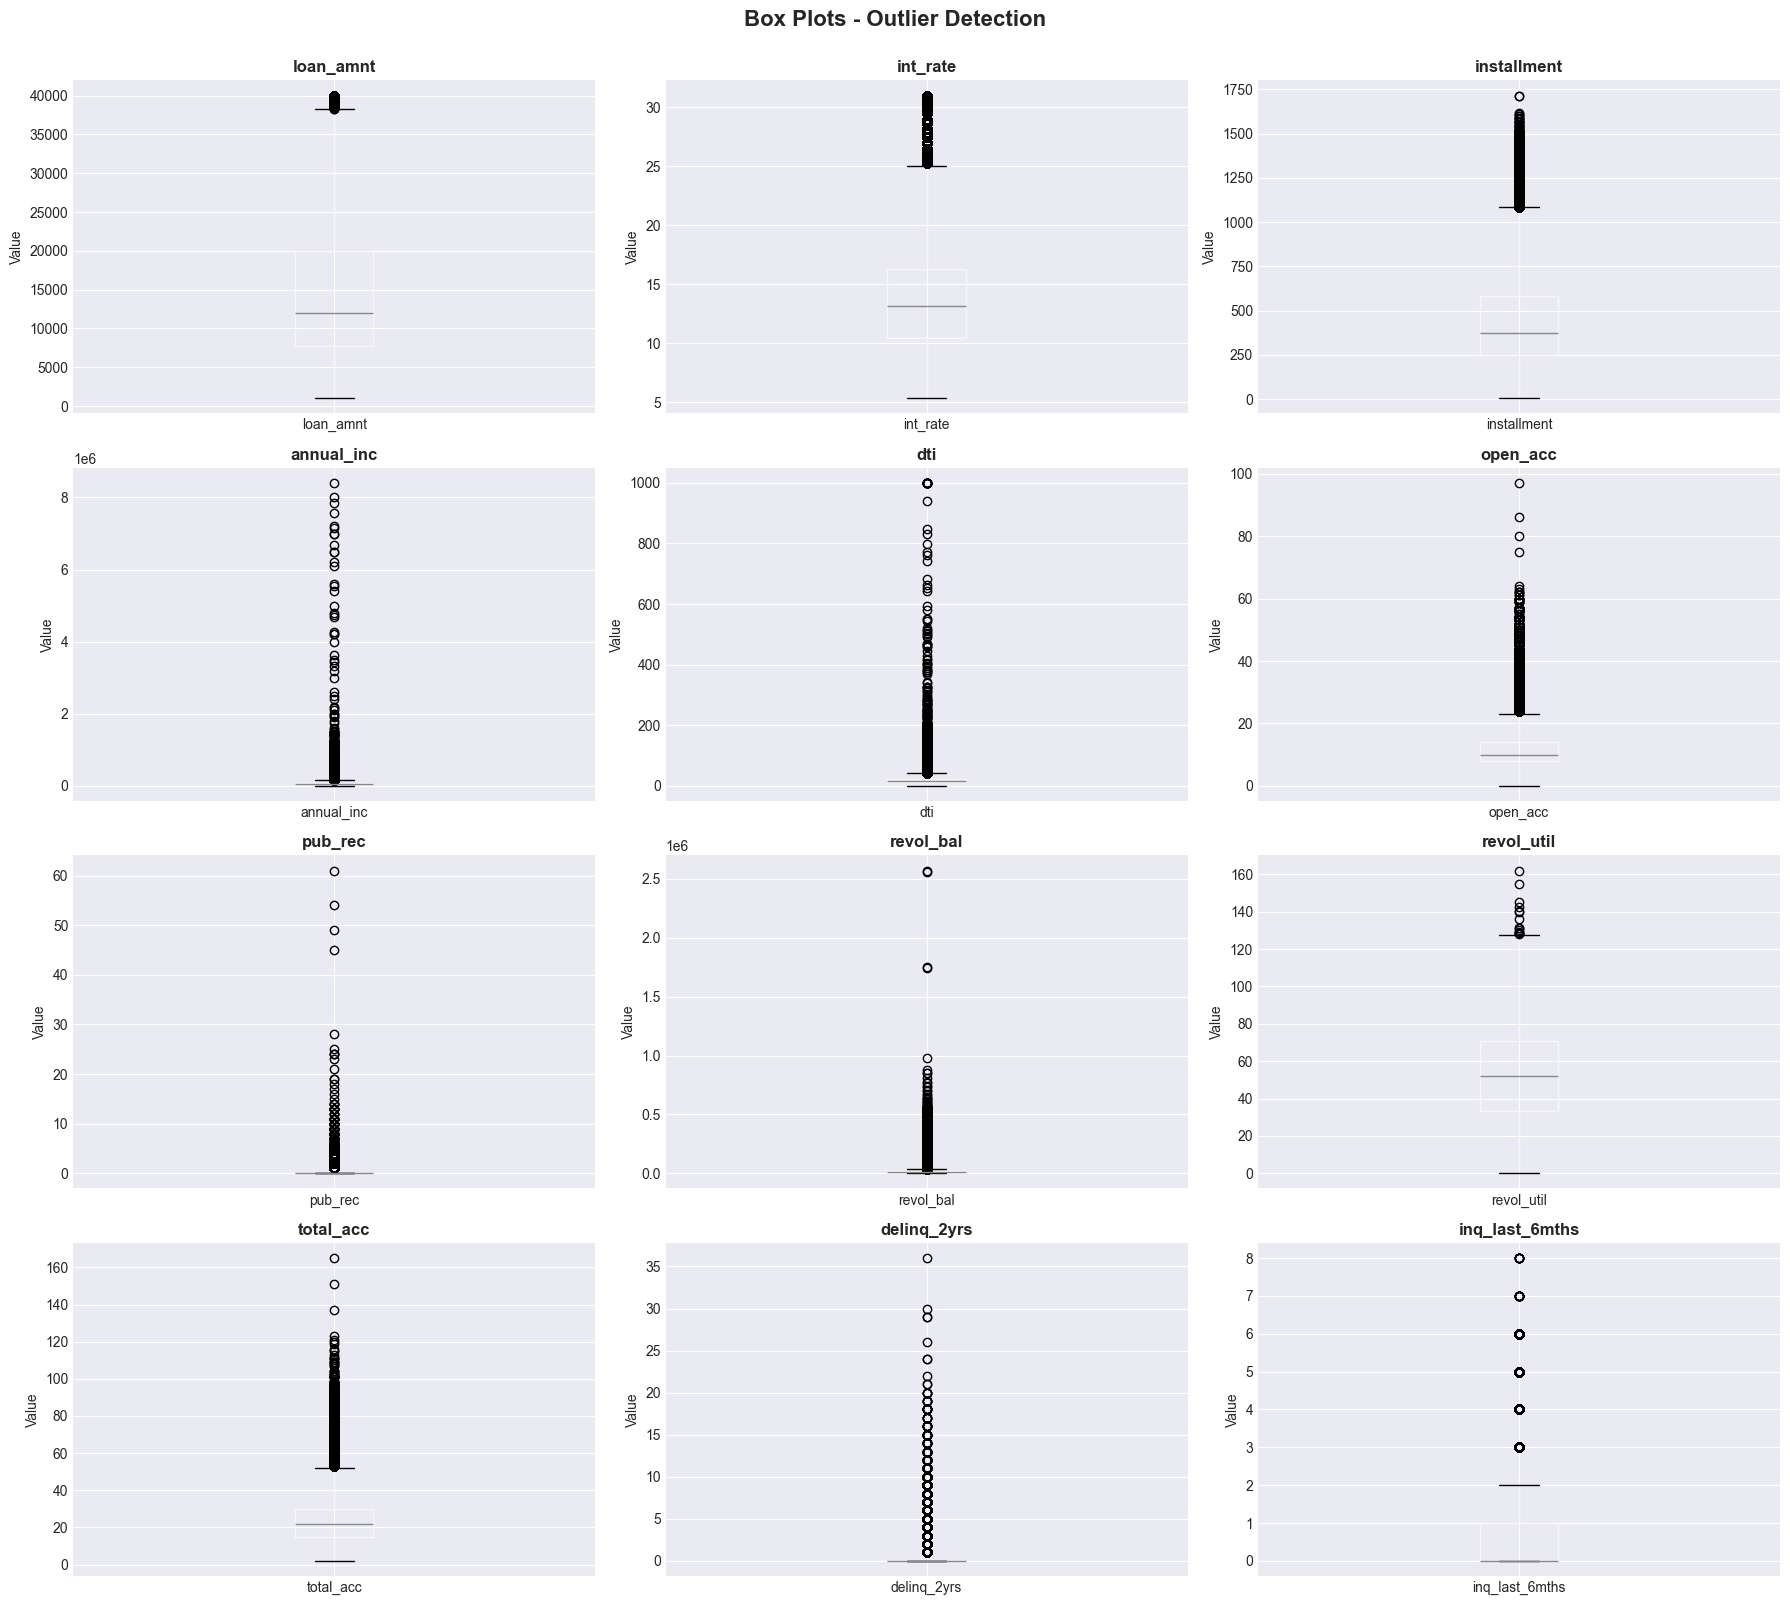

In [17]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(key_numerical[:12]):
    if col in df.columns:
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Value')

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

---
## 6. Categorical Features Analysis

In [18]:
# Key categorical features
key_categorical = [
    'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
    'verification_status', 'purpose', 'addr_state'
]

# Filter only existing columns
key_categorical = [col for col in key_categorical if col in df.columns]

print(f"Analyzing {len(key_categorical)} key categorical features\n")

for col in key_categorical[:5]:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts().head(10))

Analyzing 8 key categorical features


TERM:
term
 36 months    372445
 60 months    127580
Name: count, dtype: int64

GRADE:
grade
B    161427
C    147722
A     76201
D     74590
E     27032
F     10479
G      2574
Name: count, dtype: int64

SUB_GRADE:
sub_grade
C1    34105
B3    33967
B4    33585
B5    33025
B2    30781
B1    30069
C2    29870
C4    28883
C3    28381
C5    26483
Name: count, dtype: int64

EMP_LENGTH:
emp_length
10+ years    166235
2 years       44613
< 1 year      40205
3 years       38645
5 years       33088
1 year        32128
4 years       29902
6 years       25701
7 years       21558
8 years       19861
Name: count, dtype: int64

HOME_OWNERSHIP:
home_ownership
MORTGAGE    246546
RENT        198862
OWN          54418
ANY            111
OTHER           46
NONE            42
Name: count, dtype: int64


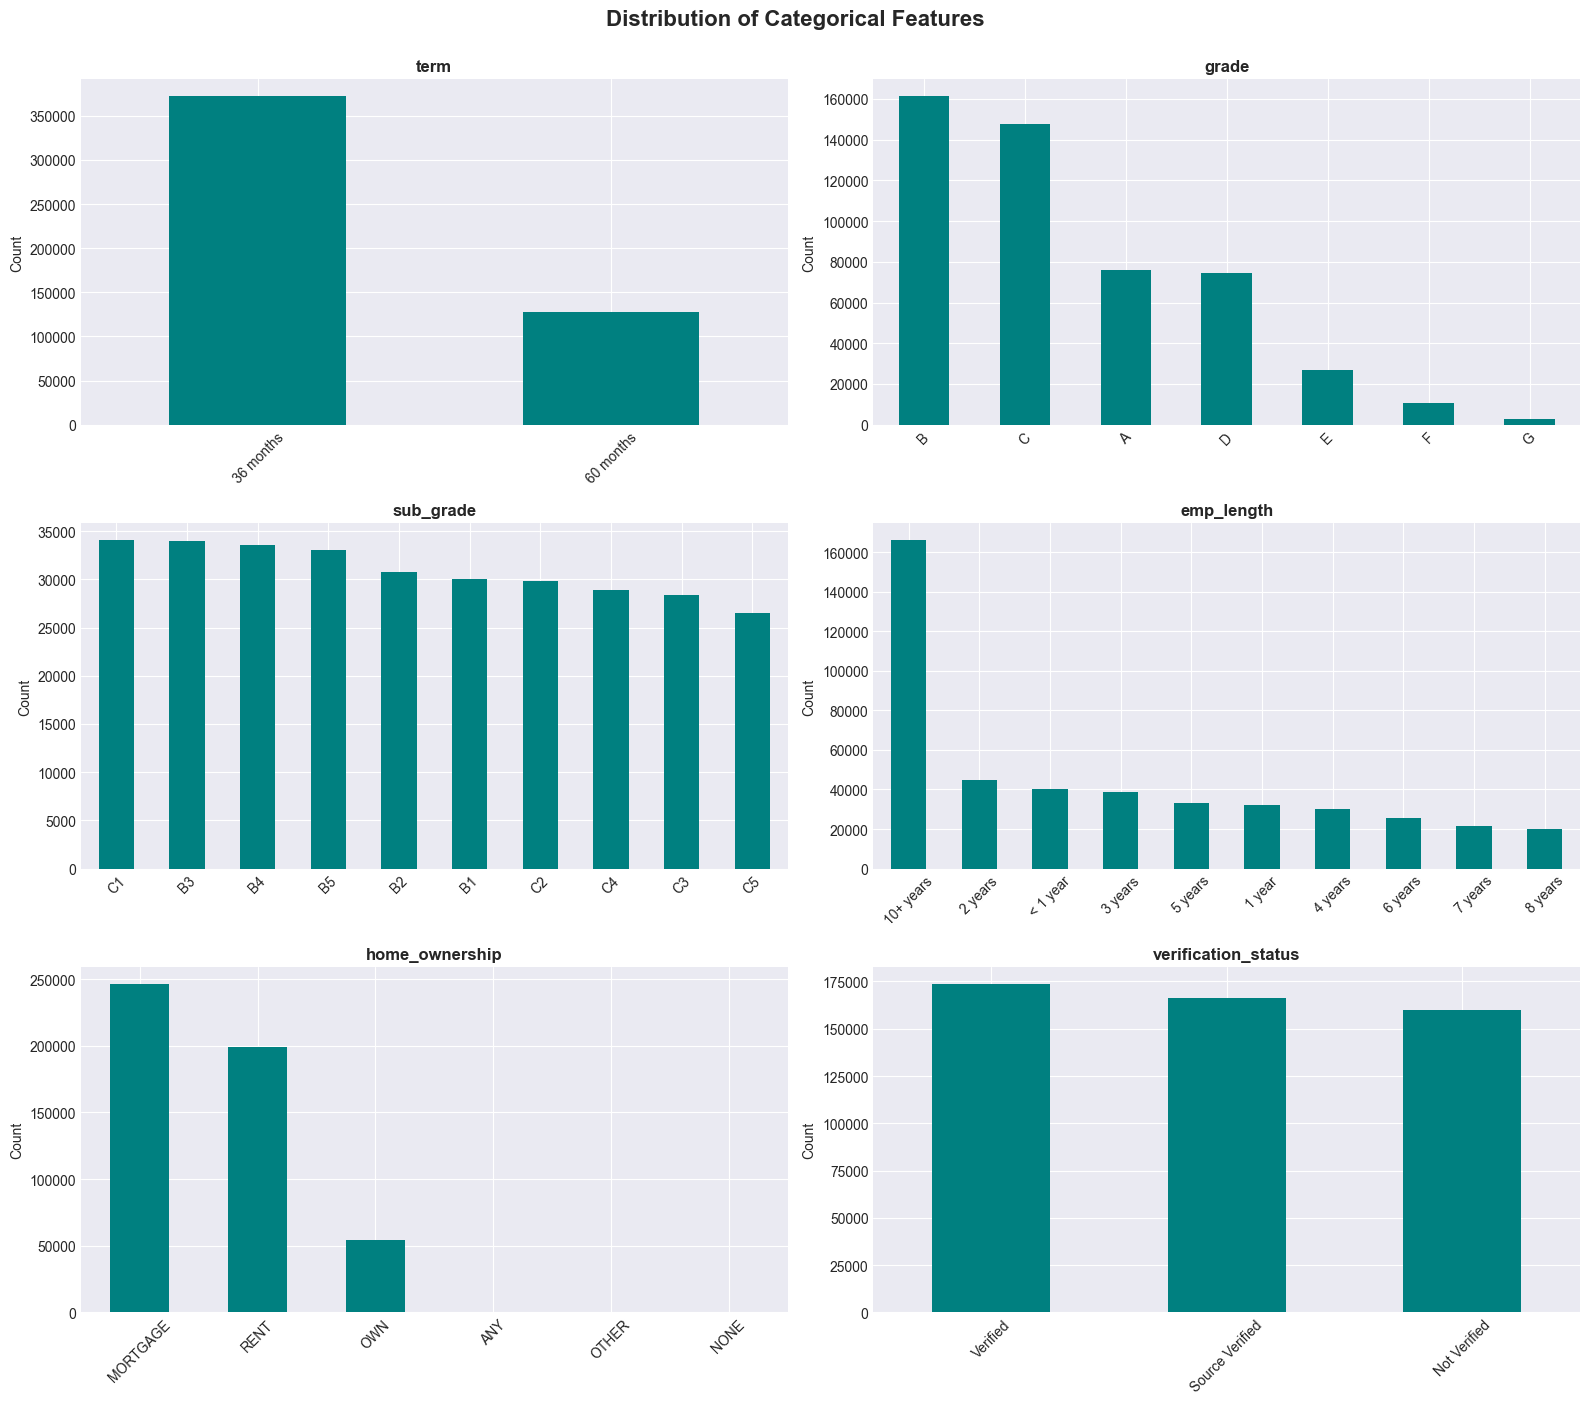

In [19]:
# Visualize categorical features
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(key_categorical[:6]):
    if col in df.columns:
        top_categories = df[col].value_counts().head(10)
        top_categories.plot(kind='bar', ax=axes[idx], color='teal')
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [20]:
# Analyze target by categorical features
# Filter data with valid target
df_valid = df[df['target'].notna()]

print("Default Rate by Categorical Features:\n")

for col in ['grade', 'term', 'home_ownership', 'purpose']:
    if col in df.columns:
        default_by_cat = df_valid.groupby(col)['target'].agg(['mean', 'count'])
        default_by_cat['mean'] = default_by_cat['mean'] * 100
        default_by_cat.columns = ['Default Rate (%)', 'Count']
        print(f"\n{col.upper()}:")
        print(default_by_cat.sort_values('Default Rate (%)', ascending=False))

Default Rate by Categorical Features:


GRADE:
       Default Rate (%)   Count
grade                          
G                46.469    2096
F                41.638    8766
E                35.277   20631
D                28.602   51280
C                22.064   95730
B                13.494  105836
A                 6.496   46689

TERM:
            Default Rate (%)   Count
term                                
 60 months            29.502   76938
 36 months            16.650  254090

HOME_OWNERSHIP:
                Default Rate (%)   Count
home_ownership                          
ANY                       25.397      63
RENT                      22.627  131111
OWN                       20.813   33364
OTHER                     19.565      46
MORTGAGE                  17.044  166402
NONE                      16.667      42

PURPOSE:
                    Default Rate (%)   Count
purpose                                     
small_business                30.427    4335
renewable_energy    

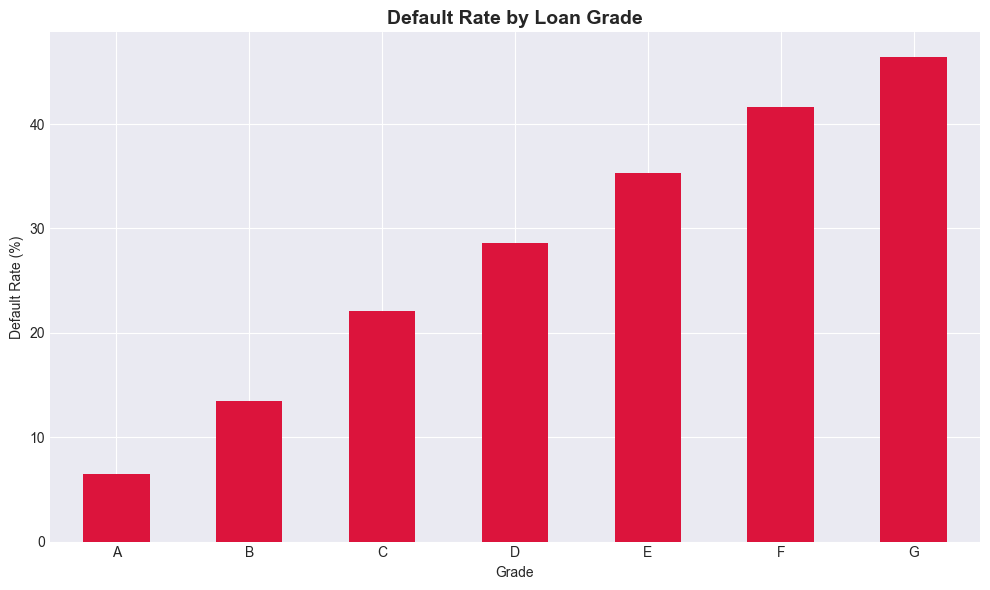

In [21]:
# Visualize default rate by grade
if 'grade' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    default_by_grade = df_valid.groupby('grade')['target'].mean() * 100
    default_by_grade.plot(kind='bar', ax=ax, color='crimson')
    
    ax.set_title('Default Rate by Loan Grade', fontsize=14, fontweight='bold')
    ax.set_xlabel('Grade')
    ax.set_ylabel('Default Rate (%)')
    ax.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

---
## 7. Temporal Patterns

In [22]:
# Convert issue_d to datetime
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')  # Sin format específico
    df['issue_year'] = df['issue_d'].dt.year
    df['issue_month'] = df['issue_d'].dt.month
    
    print("Loan issuance date range:")
    print(f"From: {df['issue_d'].min()}")
    print(f"To: {df['issue_d'].max()}")
else:
    print("WARNING: 'issue_d' column not found in dataset")
    # Crear columnas vacías para evitar errores
    df['issue_year'] = None
    df['issue_month'] = None
    
    print("Loan issuance date range:")
    print(f"From: {df['issue_d'].min()}")
    print(f"To: {df['issue_d'].max()}")

Loan issuance date range:
From: 2012-01-01 00:00:00
To: 2017-12-01 00:00:00


In [23]:
# Verificar si issue_d existe
if 'issue_d' in df.columns:
    print("✓ issue_d existe")
    print(f"Primeros valores: {df['issue_d'].head()}")
else:
    print("✗ issue_d fue eliminada")
    print("\nColumnas con 'date' o 'issue':")
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'issue' in col.lower()]
    print(date_cols)

✓ issue_d existe
Primeros valores: 0   2013-12-01
1   2013-12-01
2   2013-12-01
3   2013-12-01
4   2013-12-01
Name: issue_d, dtype: datetime64[ns]


In [24]:
# Crear las columnas de año y mes
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

print("✓ Columnas creadas")
print(f"Years range: {df['issue_year'].min()} - {df['issue_year'].max()}")
print(f"\nDistribución por año:")
print(df['issue_year'].value_counts().sort_index())

✓ Columnas creadas
Years range: 2012.0 - 2017.0

Distribución por año:
issue_year
2012.000     53367
2013.000    125344
2016.000    202666
2017.000    118648
Name: count, dtype: int64


In [25]:
# Recrear df_valid con las columnas nuevas
df_valid = df[df['target'].notna()].copy()

print(f"✓ df_valid recreado: {df_valid.shape[0]:,} filas")
print(f"Columnas incluyen issue_year: {'issue_year' in df_valid.columns}")

✓ df_valid recreado: 331,028 filas
Columnas incluyen issue_year: True


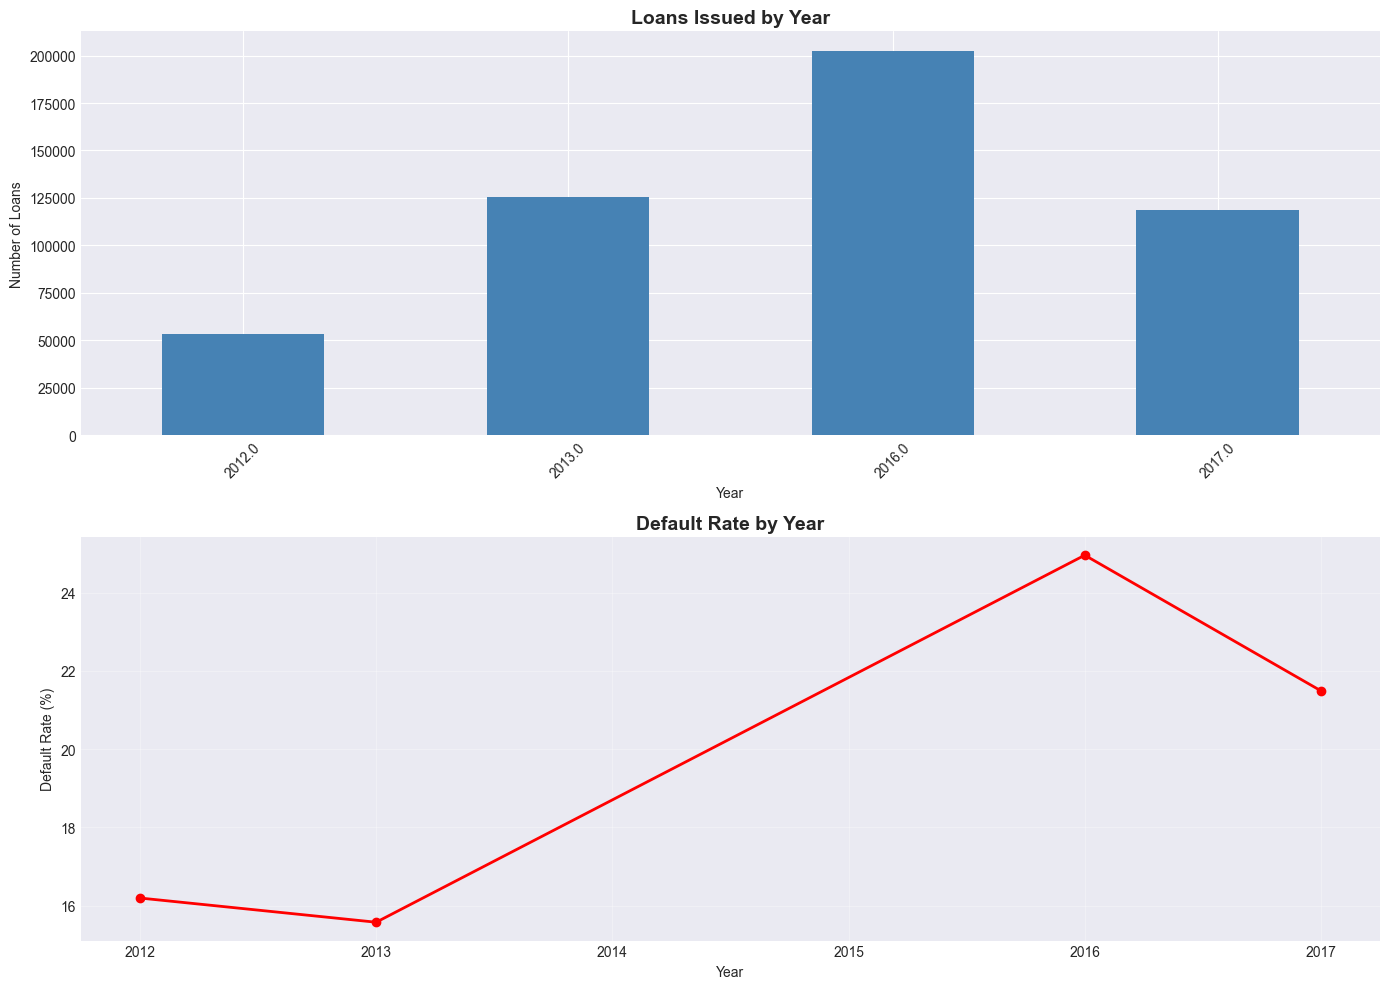

In [26]:
# Loans issued over time
if 'issue_year' in df.columns:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Loans by year
    df['issue_year'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Loans Issued by Year', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Loans')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Default rate by year
    df_valid_temporal = df_valid[df_valid['issue_year'].notna()]
    default_by_year = df_valid_temporal.groupby('issue_year')['target'].mean() * 100
    default_by_year.plot(kind='line', ax=axes[1], marker='o', color='red', linewidth=2)
    axes[1].set_title('Default Rate by Year', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Default Rate (%)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

---
## 8. Correlation Analysis

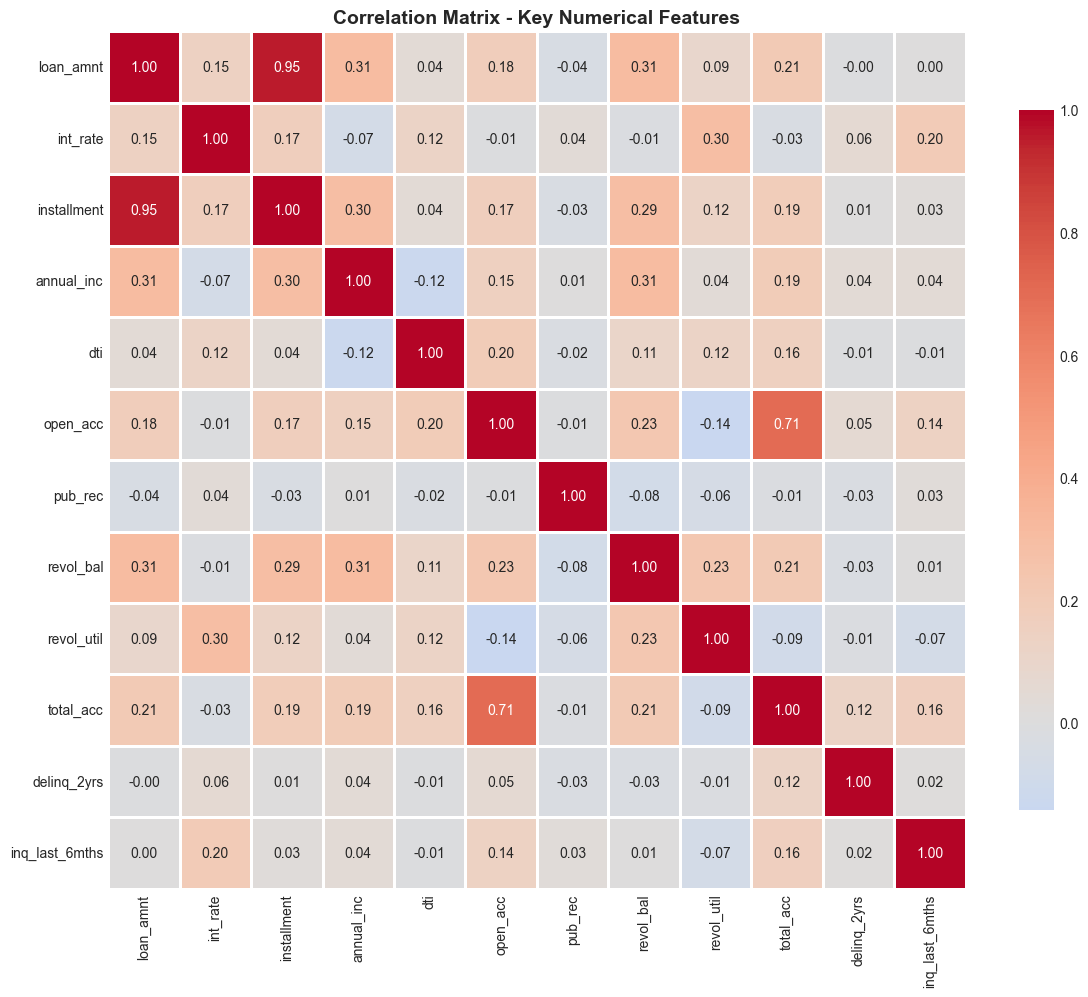

In [27]:
# Correlation matrix for numerical features
numerical_cols = df[key_numerical].select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Key Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Target (Default):

int_rate          0.229
dti               0.077
loan_amnt         0.067
installment       0.062
inq_last_6mths    0.054
revol_util        0.047
pub_rec           0.032
delinq_2yrs       0.024
open_acc          0.023
revol_bal        -0.016
total_acc        -0.024
annual_inc       -0.040
Name: target, dtype: float64


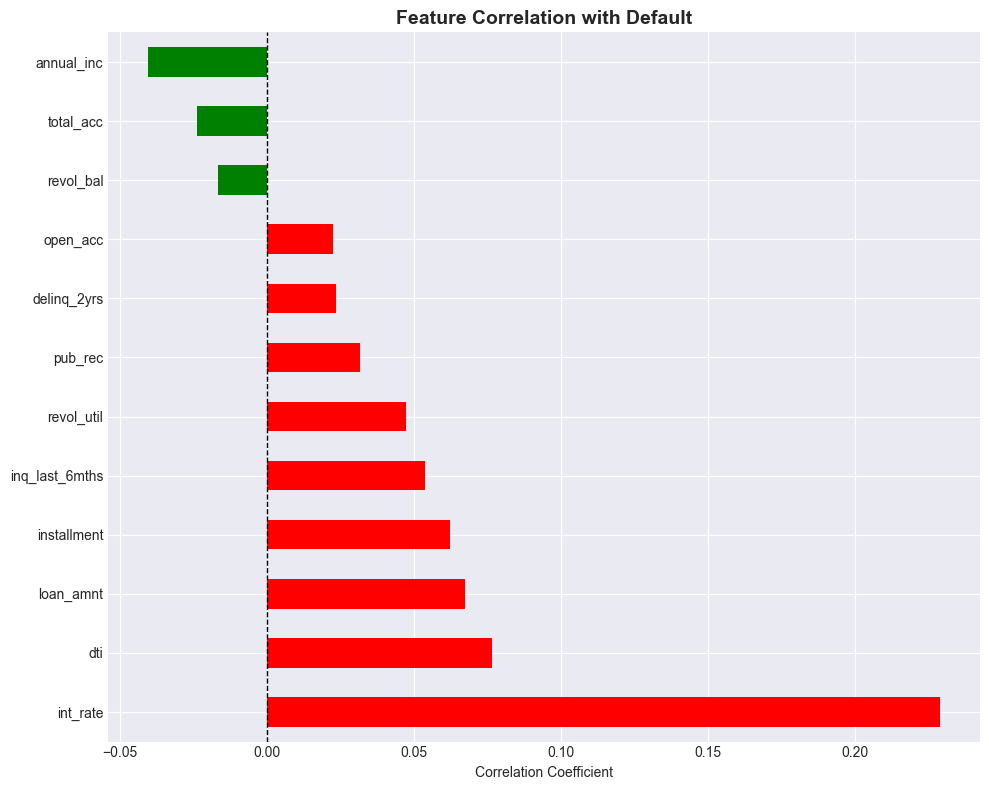

In [28]:
# Correlation with target variable
if 'target' in df.columns:
    # Add target to correlation analysis
    cols_with_target = numerical_cols.tolist() + ['target']
    target_corr = df[cols_with_target].corr()['target'].drop('target').sort_values(ascending=False)
    
    print("Correlation with Target (Default):\n")
    print(target_corr)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 8))
    target_corr.plot(kind='barh', ax=ax, color=['green' if x < 0 else 'red' for x in target_corr])
    ax.set_title('Feature Correlation with Default', fontsize=14, fontweight='bold')
    ax.set_xlabel('Correlation Coefficient')
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.show()

---
## 9. Key Insights & Next Steps

In [29]:
print("="*70)
print("KEY INSIGHTS FROM EDA")
print("="*70)

print("\n1. DATASET SIZE:")
print(f"   - Total loans: {len(df):,}")
print(f"   - Features: {len(df.columns)}")
print(f"   - Date range: {df['issue_d'].min()} to {df['issue_d'].max()}" if 'issue_d' in df.columns else "")

print("\n2. TARGET VARIABLE:")
if 'target' in df.columns:
    print(f"   - Default rate: {df['target'].mean() * 100:.2f}%")
    print(f"   - Class imbalance: {(1 - df['target'].mean()) / df['target'].mean():.1f}:1 (Paid:Default)")

print("\n3. MISSING VALUES:")
print(f"   - Columns with >50% missing: {len(missing_cols[missing_cols['missing_pct'] > 50])}")
print(f"   - Columns with >80% missing: {len(missing_cols[missing_cols['missing_pct'] > 80])}")

print("\n4. KEY PREDICTIVE SIGNALS:")
if 'grade' in df.columns:
    print(f"   - Grade: Default rate varies from {df_valid.groupby('grade')['target'].mean().min()*100:.1f}% to {df_valid.groupby('grade')['target'].mean().max()*100:.1f}%")
if 'int_rate' in df.columns:
    print(f"   - Interest Rate: Strong positive correlation with default")
if 'dti' in df.columns:
    print(f"   - Debt-to-Income: Higher DTI → Higher default risk")

print("\n5. DATA QUALITY ISSUES:")
print(f"   - Need to handle missing values strategically")
print(f"   - Outliers detected in income, loan amount, DTI")
print(f"   - Temporal patterns suggest economic cycles impact default rates")

print("\n" + "="*70)
print("NEXT STEPS - FEATURE ENGINEERING")
print("="*70)

print("""
1. Handle missing values with financial domain logic
2. Create binary target variable (exclude ambiguous statuses)
3. Engineer features:
   - Credit utilization rate
   - Payment-to-income ratio
   - Credit history length
   - Employment stability flags
   - High-risk purpose indicators
4. Remove data leakage features (payment history)
5. Implement temporal train/test split
6. Feature selection and scaling
""")

print("="*70)

KEY INSIGHTS FROM EDA

1. DATASET SIZE:
   - Total loans: 500,033
   - Features: 154
   - Date range: 2012-01-01 00:00:00 to 2017-12-01 00:00:00

2. TARGET VARIABLE:
   - Default rate: 19.64%
   - Class imbalance: 4.1:1 (Paid:Default)

3. MISSING VALUES:
   - Columns with >50% missing: 44
   - Columns with >80% missing: 39

4. KEY PREDICTIVE SIGNALS:
   - Grade: Default rate varies from 6.5% to 46.5%
   - Interest Rate: Strong positive correlation with default
   - Debt-to-Income: Higher DTI → Higher default risk

5. DATA QUALITY ISSUES:
   - Need to handle missing values strategically
   - Outliers detected in income, loan amount, DTI
   - Temporal patterns suggest economic cycles impact default rates

NEXT STEPS - FEATURE ENGINEERING

1. Handle missing values with financial domain logic
2. Create binary target variable (exclude ambiguous statuses)
3. Engineer features:
   - Credit utilization rate
   - Payment-to-income ratio
   - Credit history length
   - Employment stability flags

In [30]:
# Save key findings for next notebook
eda_findings = {
    'total_loans': len(df),
    'total_features': len(df.columns),
    'default_rate': df['target'].mean() * 100 if 'target' in df.columns else None,
    'date_range': (df['issue_d'].min(), df['issue_d'].max()) if 'issue_d' in df.columns else None,
    'key_numerical': key_numerical,
    'key_categorical': key_categorical,
    'high_missing_cols': missing_cols[missing_cols['missing_pct'] > 50]['column'].tolist()
}

print("✓ EDA complete! Findings saved for feature engineering phase.")

✓ EDA complete! Findings saved for feature engineering phase.
